In [14]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
gridDS= Dataset('/scratch/srai6/EddyKillingPaper3/CESM/newGlobalGrid_tripolePOP_0.1deg.nc')
KMT = np.array(gridDS.variables['KMT'])
UAREA = np.array(gridDS.variables['UAREA'])
ULONG = np.array(gridDS.variables['ULONG'])
ULAT = np.array(gridDS.variables['ULAT'])
landMask = KMT < 1
landMask += np.abs(ULAT)<=3

In [16]:
ds= Dataset('/scratch/srai6/EddyKillingPaper3/CESM/all7yrs_land0/tavgFiltered_0180.nc')
EPPA = np.array(ds.variables['EddyPowerPerArea'][0,:,:], dtype=float)
# EPPA[np.isinf(EPPA)] = 0.0
# EPPA[np.isnan(EPPA)] = 0.0
# EPPA[abs(EPPA)>1e10] = 0.0
EPPA[landMask] = float('nan')

In [17]:
print(np.nansum(UAREA * EPPA)*1e-16)

-67.24934240260572


/local_scratch/16940902/ipykernel_8906/566782451.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(ULONG, ULAT, EPPA, vmin=-v, vmax=v, cmap=cmap)


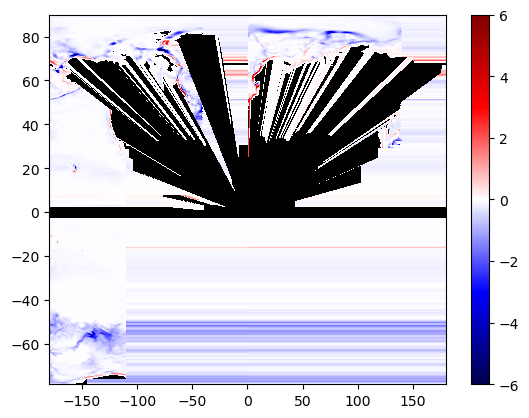

In [42]:
cmap= plt.get_cmap('seismic').copy()
cmap.set_bad('k')
v  = 6
plt.pcolormesh(ULONG, ULAT, EPPA, vmin=-v, vmax=v, cmap=cmap)
plt.colorbar()

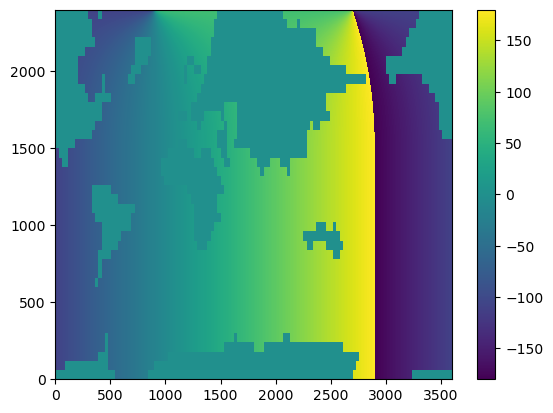

In [46]:
plt.pcolormesh(ULONG)
plt.colorbar()

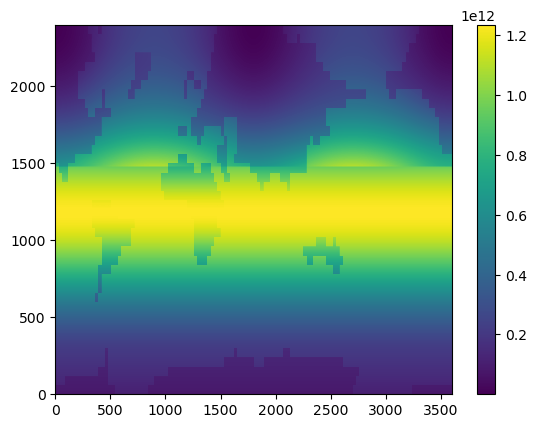

In [15]:
plt.pcolormesh(UAREA)
plt.colorbar()

4.844997e+18